#### Построение двухслойной нейронный сети для классификации цветков ириса


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


In [2]:
### Шаг 1. Определение функций, которые понадобятся для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized


In [3]:
# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

In [4]:
# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [5]:
# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [6]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("D:/task/Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


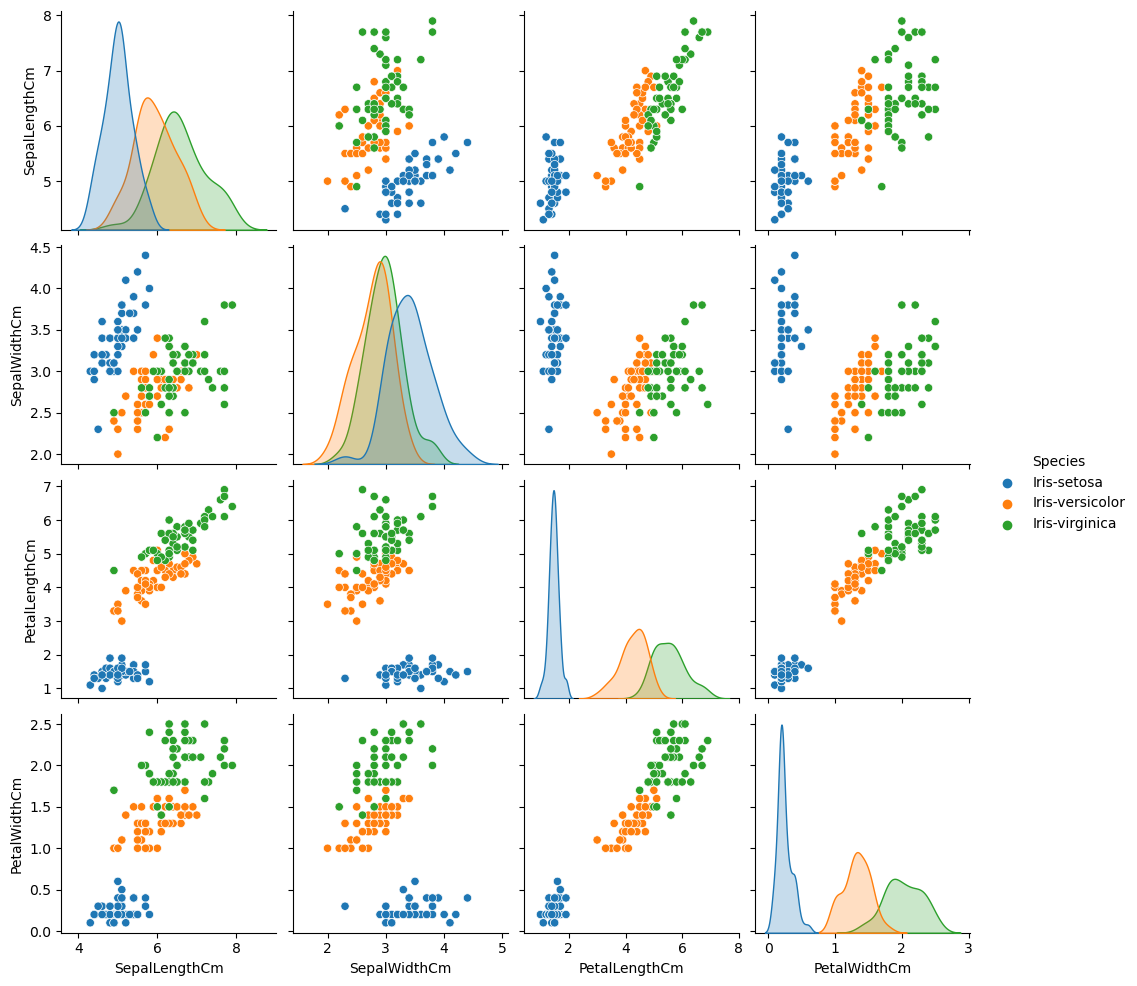

In [7]:
# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
plt.show() # расскоментируйте, чтобы посмотреть


In [8]:
# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)


In [9]:
# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)
x


array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [10]:
# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [11]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)


In [12]:
### Шаг 3. Обученние нейронной сети
# присваивание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

In [ ]:
# скорость обучения (learning rate)
n = 0.001
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    print(f'{i} эпоха, точность {accuracy}')

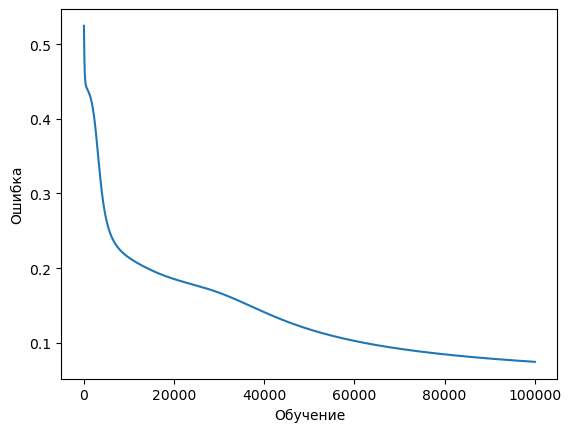

Точность нейронной сети 92.56%


In [14]:
### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

## Домашнее задание

# 1 
#### изменим learning rate

In [15]:
# скорость обучения (learning rate)
n = 0.01
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    print(f'{i} эпоха, точность {accuracy}')

0 эпоха, точность 92.55817693330165
1 эпоха, точность 92.55856700643906
2 эпоха, точность 92.55895699485623
3 эпоха, точность 92.55934689849221
4 эпоха, точность 92.55973671729603
5 эпоха, точность 92.56012645122557
6 эпоха, точность 92.56051610024657
7 эпоха, точность 92.56090566433173
8 эпоха, точность 92.56129514345996
9 эпоха, точность 92.56168453761563
10 эпоха, точность 92.56207384678801
11 эпоха, точность 92.56246307097071
12 эпоха, точность 92.56285221016118
13 эпоха, точность 92.56324126436026
14 эпоха, точность 92.56363023357181
15 эпоха, точность 92.56401911780245
16 эпоха, точность 92.5644079170611
17 эпоха, точность 92.56479663135887
18 эпоха, точность 92.5651852607087
19 эпоха, точность 92.56557380512524
20 эпоха, точность 92.56596226462462
21 эпоха, точность 92.56635063922424
22 эпоха, точность 92.56673892894273
23 эпоха, точность 92.56712713379973
24 эпоха, точность 92.56751525381578
25 эпоха, точность 92.56790328901234
26 эпоха, точность 92.56829123941144
27 эпоха, точ

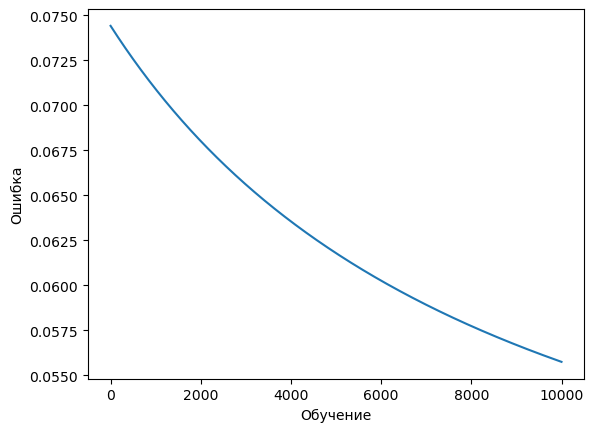

Точность нейронной сети 94.42%


In [16]:
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

# 2

In [17]:
n = 0.1
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    print(f'{i} эпоха, точность {accuracy}')

0 эпоха, точность 94.42490184436366
1 эпоха, точность 94.42578999333449
2 эпоха, точность 94.42667726054925
3 эпоха, точность 94.4275636169379
4 эпоха, точность 94.42844905016557
5 эпоха, точность 94.42933355538287
6 эпоха, точность 94.43021713112269
7 эпоха, точность 94.43109977746983
8 эпоха, точность 94.43198149523724
9 эпоха, точность 94.43286228559035
10 эпоха, точность 94.43374214987233
11 эпоха, точность 94.43462108952036
12 эпоха, точность 94.43549910602388
13 эпоха, точность 94.4363762009027
14 эпоха, точность 94.4372523756948
15 эпоха, точность 94.43812763194916
16 эпоха, точность 94.43900197122133
17 эпоха, точность 94.4398753950704
18 эпоха, точность 94.44074790505715
19 эпоха, точность 94.44161950274265
20 эпоха, точность 94.44249018968735
21 эпоха, точность 94.44335996745036
22 эпоха, точность 94.4442288375892
23 эпоха, точность 94.44509680165919
24 эпоха, точность 94.44596386121353
25 эпоха, точность 94.44683001780298
26 эпоха, точность 94.4476952729758
27 эпоха, точност

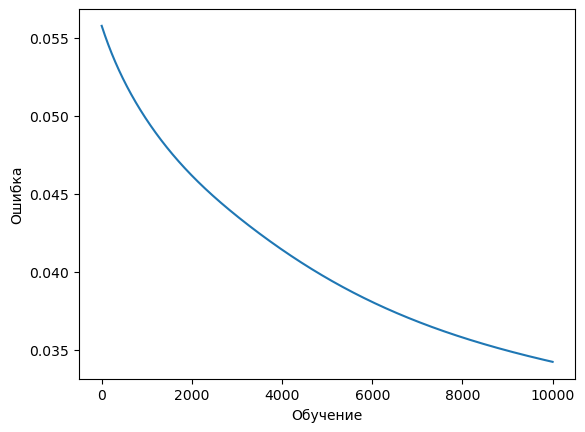

Точность нейронной сети 96.58%


In [18]:
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

# 3

In [19]:
n = 0.001
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(30000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    print(f'{i} эпоха, точность {accuracy}')

0 эпоха, точность 96.57882219012764
1 эпоха, точность 96.57882285111872
2 эпоха, точность 96.5788235121089
3 эпоха, точность 96.57882417309818
4 эпоха, точность 96.57882483408659
5 эпоха, точность 96.5788254950741
6 эпоха, точность 96.57882615606071
7 эпоха, точность 96.57882681704642
8 эпоха, точность 96.57882747803124
9 эпоха, точность 96.57882813901514
10 эпоха, точность 96.57882879999818
11 эпоха, точность 96.57882946098032
12 эпоха, точность 96.57883012196154
13 эпоха, точность 96.57883078294186
14 эпоха, точность 96.57883144392127
15 эпоха, точность 96.5788321048998
16 эпоха, точность 96.57883276587744
17 эпоха, точность 96.57883342685416
18 эпоха, точность 96.57883408782996
19 эпоха, точность 96.5788347488049
20 эпоха, точность 96.57883540977889
21 эпоха, точность 96.57883607075199
22 эпоха, точность 96.57883673172421
23 эпоха, точность 96.57883739269548
24 эпоха, точность 96.5788380536659
25 эпоха, точность 96.57883871463537
26 эпоха, точность 96.57883937560395
27 эпоха, точнос

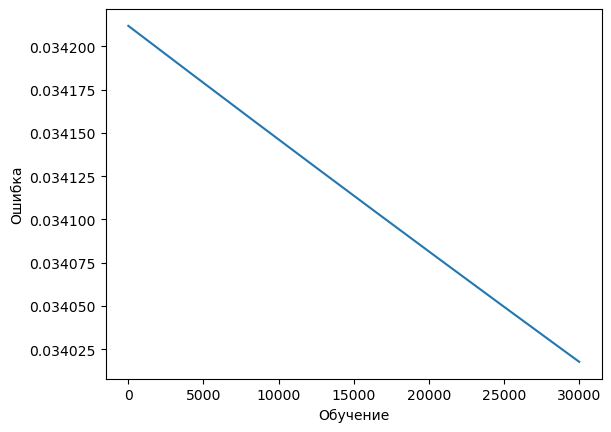

Точность нейронной сети 96.6%


In [20]:
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

# 4

In [21]:
# изменим количество скрытых нейронов
neuron = 20

# присвоим случайные веса

w0 = 2*np.random.random((4, neuron)) - 1 # для входного слоя   - 4 входа, 5 выхода
w1 = 2*np.random.random((neuron, 3)) - 1  # для внутреннего слоя - 5 входов, 3 выхода


n = 0.01
# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(10000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    
    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n

    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
   # print(f'{i} эпоха, точность {accuracy}')

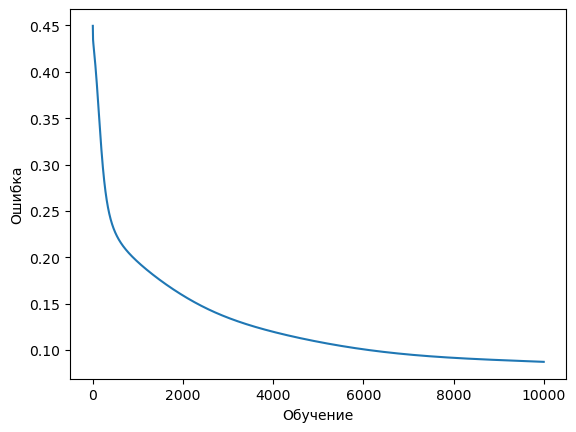

Точность нейронной сети 91.27%


In [22]:
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть

print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

### Вывод

- Что приводит к ухудшению точности нейронной сети?
=увеличение  learning rate
- Что приводит к увеличению её точности?
= увеличение количества эпох

увеличение количества нейронов вначале приводит к повышению точности, в последующем выводит на плато значений и в последующем даже к ухудшению точности. Имеется прямая связь с переобучением.